In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Load the data from wine dataset.

In [2]:
wine_data=pd.read_csv('/content/gdrive/MyDrive/wine.csv')
print(wine_data)


     Wine  Alcohol  Malic.acid   Ash  ...  Color.int   Hue    OD  Proline
0       1    14.23        1.71  2.43  ...       5.64  1.04  3.92     1065
1       1    13.20        1.78  2.14  ...       4.38  1.05  3.40     1050
2       1    13.16        2.36  2.67  ...       5.68  1.03  3.17     1185
3       1    14.37        1.95  2.50  ...       7.80  0.86  3.45     1480
4       1    13.24        2.59  2.87  ...       4.32  1.04  2.93      735
..    ...      ...         ...   ...  ...        ...   ...   ...      ...
173     3    13.71        5.65  2.45  ...       7.70  0.64  1.74      740
174     3    13.40        3.91  2.48  ...       7.30  0.70  1.56      750
175     3    13.27        4.28  2.26  ...      10.20  0.59  1.56      835
176     3    13.17        2.59  2.37  ...       9.30  0.60  1.62      840
177     3    14.13        4.10  2.74  ...       9.20  0.61  1.60      560

[178 rows x 14 columns]


Check whether all attributes are standardized or not (mean is 0 and standard deviation is 1). If not, standardize the attributes.

In [3]:
Mean_result=list()
for i in range(1,wine_data.shape[1]):
  column=wine_data.columns[i]
  Mean_result.append(wine_data[column].mean())
print(Mean_result)
print(len(Mean_result))

[13.000617977528083, 2.336348314606741, 2.3665168539325854, 19.49494382022472, 99.74157303370787, 2.295112359550562, 2.0292696629213474, 0.36185393258426973, 1.5908988764044953, 5.058089882022473, 0.9574494382022468, 2.6116853932584254, 746.8932584269663]
13


In [4]:
SD_result=list()
for i in range(1,wine_data.shape[1]):
  column=wine_data.columns[i]
  SD_result.append(wine_data[column].std())
print(SD_result)

[0.8118265380058577, 1.1171460976144627, 0.2743440090608148, 3.3395637671735052, 14.282483515295668, 0.6258510488339891, 0.9988586850169465, 0.12445334029667939, 0.5723588626747611, 2.318285871822413, 0.22857156582982338, 0.7099904287650505, 314.9074742768489]


In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = [20, 100]) 
for i in range(1,wine_data.shape[1]):
  column=wine_data.columns[i]
  plt.subplot(13, 1, i)
  plt.title(column)
  plt.hist(wine_data[column])

In [6]:
import numpy as np

from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Panel
from bokeh.models.widgets import Tabs
from bokeh.io import output_notebook

def plot_hist(data,column):
  hist,bins = np.histogram(data[column])

  hist_info = pd.DataFrame({column: hist,
                          "left": bins[:-1],
                          "right": bins[1:]})

  hist_info['tofrom'] = [f'{left} to {right}' for left,right in zip(hist_info['left'],hist_info['right'])]

  src = ColumnDataSource(hist_info) #Creating a column data source for bokeh plotting


  plot = figure(plot_height = 400, plot_width = 400,title=column)


  plot.quad(bottom = 0, top = column,left = "left", right = "right", source = src, fill_color = 'red', 
    line_color = "black", fill_alpha = 0.7,
    hover_fill_alpha = 1.0, hover_fill_color = 'blue')


  hover = HoverTool(tooltips = [('Interval', '@tofrom'),
                          ('Count', str("@" + column))])
  plot.add_tools(hover)

  show(plot)
  output_notebook()

In [7]:
for i in wine_data.columns:
  plot_hist(wine_data,i)

In [8]:
swine_data=wine_data
from sklearn import preprocessing
#for i in range(1,wine_data.shape[1]):
#  column=wine_data.columns[i]
#  print(preprocessing.scale(wine_data[column]))
for i in range(1,swine_data.shape[1]):
  column=wine_data.columns[i]
  swine_data[column]=preprocessing.scale(wine_data[column])
swine_data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,3,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,3,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,3,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [9]:
SMean_result=list()
from sklearn import preprocessing
for i in range(1,swine_data.shape[1]):
  column=swine_data.columns[i]
  SMean_result.append(round(swine_data[column].mean()))
print(SMean_result)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
SSD_result=list()
from sklearn import preprocessing
for i in range(1,swine_data.shape[1]):
  column=swine_data.columns[i]
  SSD_result.append(round(swine_data[column].std()))
print(SSD_result)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


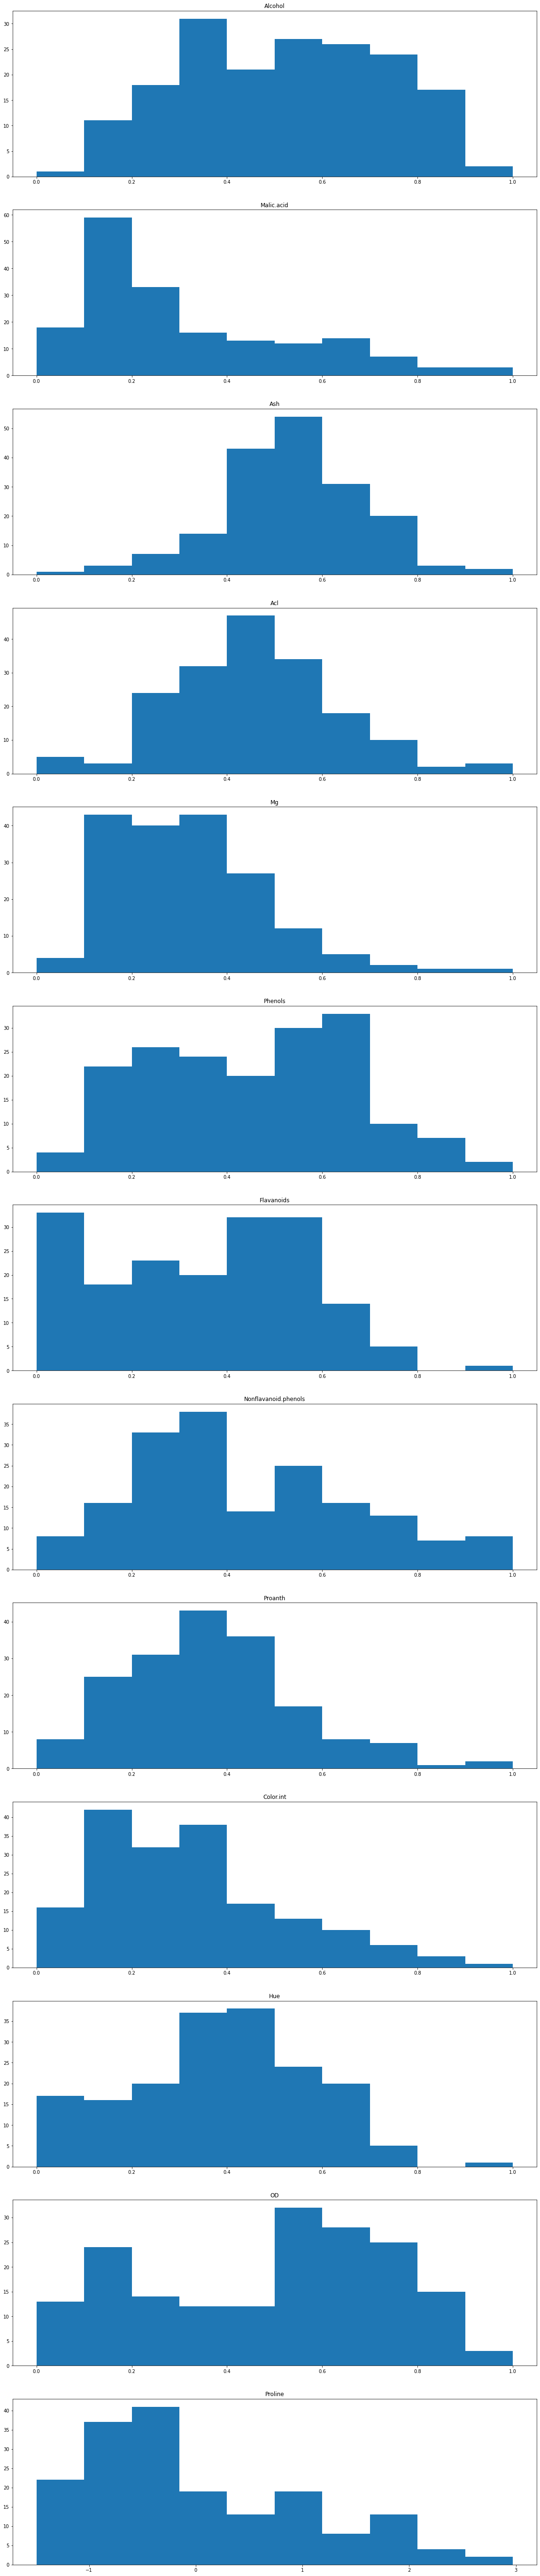

In [26]:
plt.figure(figsize = [20, 100]) 
for i in range(1,swine_data.shape[1]):
  column=swine_data.columns[i]
  plt.subplot(13, 1, i)
  plt.title(column)
  plt.hist(swine_data[column])

In [12]:
for i in swine_data.columns:
  plot_hist(swine_data,i)

 Do the same with Iris dataset.

In [13]:
iris_data=pd.read_csv('/content/gdrive/MyDrive/iris.csv')
print(iris_data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [14]:
Mean_result1=list()
for i in range(0,iris_data.shape[1]-1):
  column=iris_data.columns[i]
  Mean_result1.append(iris_data[column].mean())
print(Mean_result1)


[5.843333333333335, 3.0540000000000007, 3.7586666666666693, 1.1986666666666672]


In [15]:
SD_result1=list()
for i in range(0,iris_data.shape[1]-1):
  column=iris_data.columns[i]
  SD_result1.append(iris_data[column].std())
print(SD_result1)

[0.8280661279778629, 0.4335943113621737, 1.7644204199522617, 0.7631607417008414]


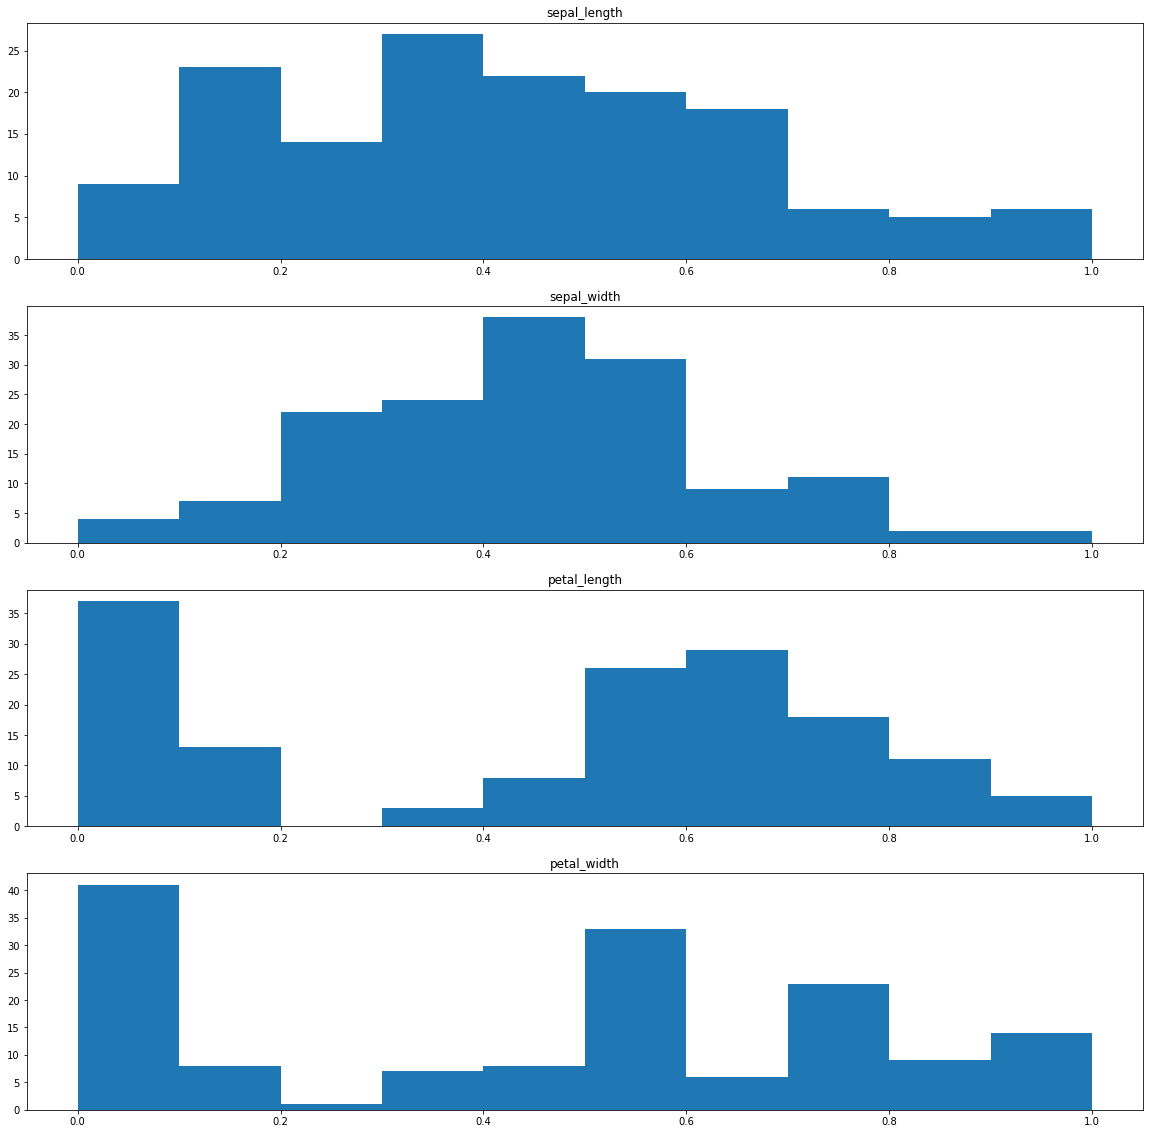

In [27]:
from matplotlib import pyplot as plt
plt.figure(figsize = [20, 20]) 
for i in range(0,iris_data.shape[1]-1):
  column=iris_data.columns[i]
  plt.subplot(4, 1, i+1)
  plt.title(column)
  plt.hist(iris_data[column])

In [17]:
for i in range(0,iris_data.shape[1]-1):
  column=iris_data.columns[i]
  plot_hist(iris_data,column)

In [18]:
siris_data=iris_data
from sklearn import preprocessing
#for i in range(0,iris_data.shape[1]-1):
#  column=iris_data.columns[i]
#  print(preprocessing.scale(iris_data[column]))
for i in range(0,siris_data.shape[1]-1):
  column=iris_data.columns[i]
  siris_data[column]=preprocessing.scale(iris_data[column])
siris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,virginica
146,0.553333,-1.281972,0.705893,0.922064,virginica
147,0.795669,-0.124958,0.819624,1.053537,virginica
148,0.432165,0.800654,0.933356,1.447956,virginica


In [19]:
SMean_result1=list()
from sklearn import preprocessing
for i in range(0,siris_data.shape[1]-1):
  column=siris_data.columns[i]
  SMean_result1.append(round(siris_data[column].mean()))
print(SMean_result1)

[0, 0, 0, 0]


In [20]:
SSD_result1=list()
from sklearn import preprocessing
for i in range(0,siris_data.shape[1]-1):
  column=siris_data.columns[i]
  SSD_result1.append(round(siris_data[column].std()))
print(SSD_result1)

[1, 1, 1, 1]


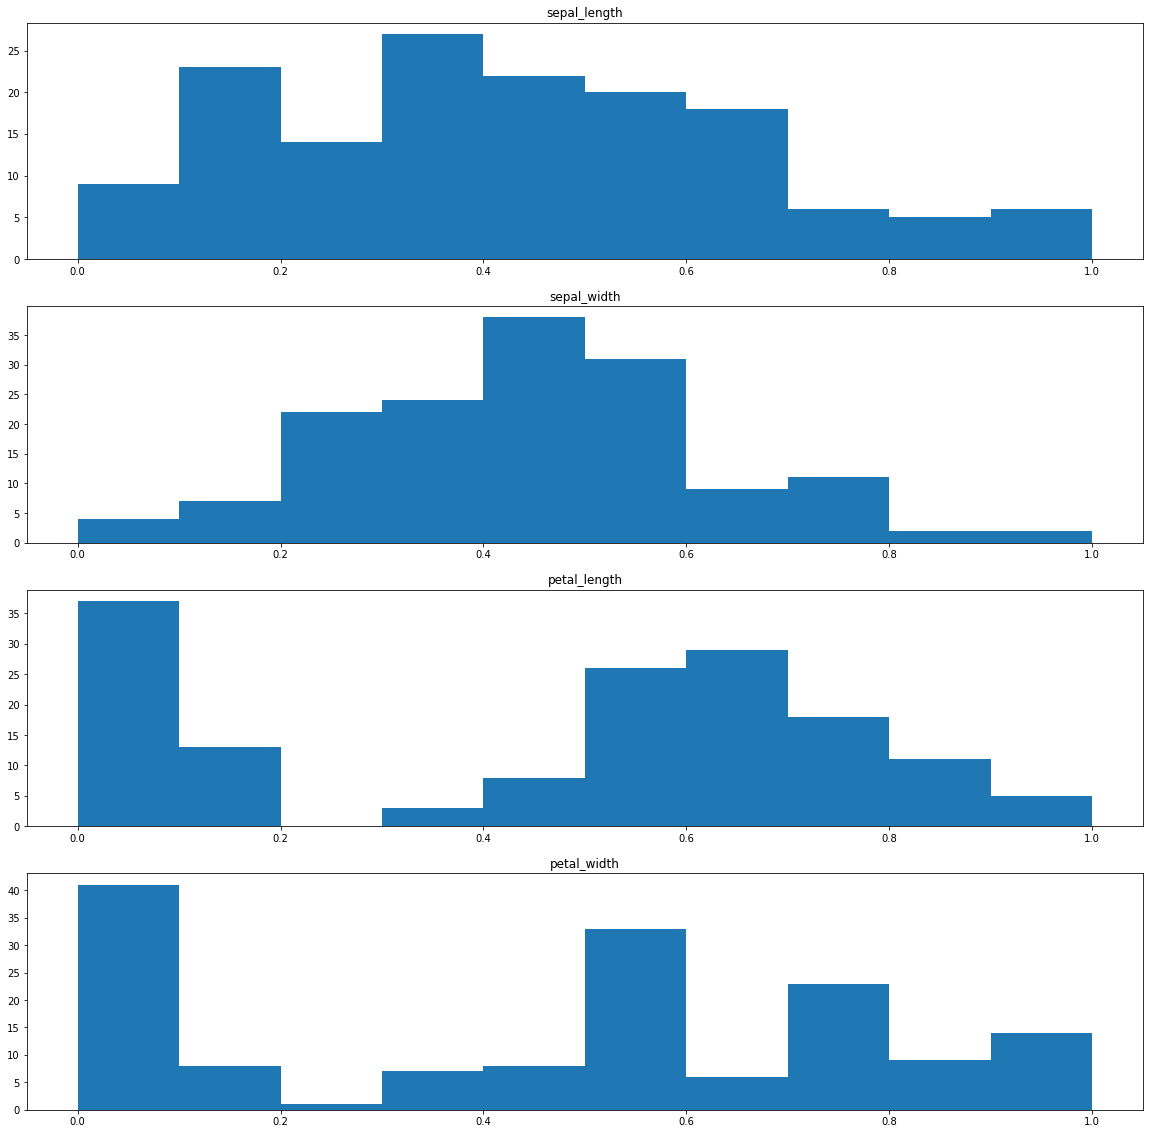

In [29]:
plt.figure(figsize = [20, 20]) 
for i in range(0,siris_data.shape[1]-1):
  column=siris_data.columns[i]
  plt.subplot(4, 1, i+1)
  plt.title(column)
 
  plt.hist(siris_data[column])

In [22]:
for i in range(0,iris_data.shape[1]-1):
  column=iris_data.columns[i]
  plot_hist(iris_data,column)

In [23]:
from sklearn.preprocessing import MinMaxScaler
niris_data=iris_data
x = niris_data.iloc[:,:-1].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
niris_data = pd.DataFrame(x_scaled)

#print(niris_data)
mmniris_data=iris_data

for i in range(0,siris_data.shape[1]-1):
  column=siris_data.columns[i]
  #print(i)
  #print(column)
  mmniris_data[column]=niris_data[i]
print(mmniris_data)

     sepal_length  sepal_width  petal_length  petal_width    species
0        0.222222     0.625000      0.067797     0.041667     setosa
1        0.166667     0.416667      0.067797     0.041667     setosa
2        0.111111     0.500000      0.050847     0.041667     setosa
3        0.083333     0.458333      0.084746     0.041667     setosa
4        0.194444     0.666667      0.067797     0.041667     setosa
..            ...          ...           ...          ...        ...
145      0.666667     0.416667      0.711864     0.916667  virginica
146      0.555556     0.208333      0.677966     0.750000  virginica
147      0.611111     0.416667      0.711864     0.791667  virginica
148      0.527778     0.583333      0.745763     0.916667  virginica
149      0.444444     0.416667      0.694915     0.708333  virginica

[150 rows x 5 columns]


In [24]:
from sklearn.preprocessing import MinMaxScaler
nwine_data=wine_data
x = nwine_data.iloc[:,:-1].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
nwine_data = pd.DataFrame(x_scaled)

#print(wine_data)
mmnwine_data=wine_data

for i in range(0,swine_data.shape[1]-1):
  column=swine_data.columns[i]
  #print(i)
  #print(column)
  mmnwine_data[column]=nwine_data[i]
print(mmnwine_data)

     Wine   Alcohol  Malic.acid  ...       Hue        OD   Proline
0     0.0  0.842105    0.191700  ...  0.455285  0.970696  1.013009
1     0.0  0.571053    0.205534  ...  0.463415  0.780220  0.965242
2     0.0  0.560526    0.320158  ...  0.447154  0.695971  1.395148
3     0.0  0.878947    0.239130  ...  0.308943  0.798535  2.334574
4     0.0  0.581579    0.365613  ...  0.455285  0.608059 -0.037874
..    ...       ...         ...  ...       ...       ...       ...
173   1.0  0.705263    0.970356  ...  0.130081  0.172161 -0.021952
174   1.0  0.623684    0.626482  ...  0.178862  0.106227  0.009893
175   1.0  0.589474    0.699605  ...  0.089431  0.106227  0.280575
176   1.0  0.563158    0.365613  ...  0.097561  0.128205  0.296498
177   1.0  0.815789    0.664032  ...  0.105691  0.120879 -0.595160

[178 rows x 14 columns]


In [25]:
iris_data.iloc[:,:-1]

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667
